In [1]:
import solenoid_3d as s3d
import solenoid_2d as s2d
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc
import importlib
importlib.reload(s3d)
importlib.reload(s2d)

<module 'solenoid_2d' from '/Applications/GPT/B_field_calc/B_feild_calc/solenoid_2d.py'>

In [2]:
R=36/2*1E-3
z0=28/2*1E-3
dz=1.1*1E-3
dr=1.1*1E-3
nz=12
nr=12
I=1

rholim=[-.05,.05]
zlim=[-.05,.05]

r,rho,z=s2d.grid_2d([0,.05],[-.05,.05],[400,800])


maps=s2d.solenoid_2d_map(R,z0,dz,dr,nz,nr,r,I)

  0%|          | 0/12 [00:00<?, ?it/s]/Applications/GPT/B_field_calc/B_feild_calc/solenoid_2d.py:59: RuntimeWarning: divide by zero encountered in true_divide
  pfac=sc.mu_0*I/(2*sc.pi*rho)
/Applications/GPT/B_field_calc/B_feild_calc/solenoid_2d.py:65: RuntimeWarning: invalid value encountered in multiply
  return pfac*fac1*fac2
100%|██████████| 12/12 [00:10<00:00,  1.18it/s]

0.018000000000000002


In [176]:
import matplotlib as mpl

key="full_width_g"
#key="square"

if key == "full_width_g":
    w=4.7
    h=w/1.618

if key == "insert":
    w=4.7/2*(30/41)
#    h=w/1.618
    h=2*30/41

if key == "half_width_g":
    w=4.7/2
#    h=w/1.618
    h=2
if key == "full_width_10":
    w=4.7
    h=4
    
if key == "square":
    w=4.7
    h=4.7

mpl.rcParams['figure.figsize'] = [w, h]
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'

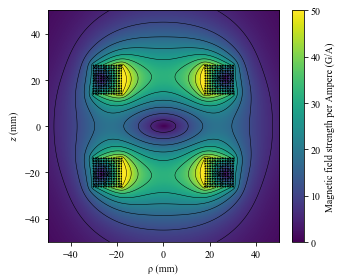

In [175]:
lim=(5E-3)*1e4
limc=(5E-3)*1e4
ext=np.array([*rholim,*zlim])*1E3
levels=np.linspace(0,limc,10)
fig=plt.imshow(maps[0][2]*1e4,vmax=lim,vmin=0,extent=ext)
c=plt.contour(maps[0][2]*1e4,levels,colors=['k'],vmax=limc,vmin=0,linestyles='solid',linewidths=.5,extent=ext)
plt.colorbar(fig,fraction=.0455,label='Magnetic field strength per Ampere (G/A)')
plt.xlabel('ρ (mm)')
plt.ylabel('$z$ (mm)')
plt.tight_layout()
plt.savefig('2d_trapping_Bfield.pdf',dpi=300,bbox='tight')

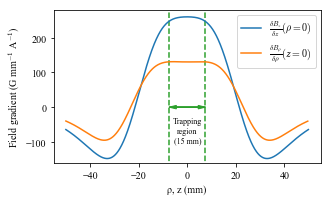

In [206]:
Bz_ax=maps[0][0][:,0]*1e7
Brho_ax=np.append(maps[0][1][400,::-1],-maps[0][1][400,1:-1])*1e7



z=np.linspace(*zlim,800)*1E3

trap=15

plt.plot(z[:-1],np.diff(Bz_ax),label='$\\frac{\delta B_z}{\delta z}(\\rho=0)$')
plt.plot(z[:-3],np.diff(Brho_ax),label='$\\frac{\delta B_\\rho}{\delta \\rho}(z=0)$')
plt.xlabel('ρ, z (mm)')
plt.ylabel('Field gradient (G mm$^{-1}$ A$^{-1}$)')
plt.vlines([-trap/2,trap/2],-200,300, color='C2',linestyle='--')
plt.ylim([-160,280])
plt.arrow(-trap/2,0,trap,0,color='C2',length_includes_head=True,head_length=3,head_width=10)
plt.arrow(trap/2,0,-trap,0,color='C2',length_includes_head=True,head_length=3,head_width=10)
plt.text(0,-100,'Trapping\nregion\n(15 mm)',horizontalalignment='center',size=8)
plt.legend()
plt.tight_layout()
plt.savefig('2d_trapping_grad.pdf',dpi=300,bbox='tight')

# plt.xlim([395,405])
# plt.ylim([-500,-440])

In [207]:
t_min=np.argmin(abs(z+trap/2))
t_max=np.argmin(abs(z-trap/2))

print('{0:.1f}({1:.1f})'.format(np.mean(np.diff(Bz_ax)[t_min:t_max]),np.std(np.diff(Bz_ax)[t_min:t_max])))
print('{0:.1f}({1:.1f})'.format(np.mean(np.diff(Brho_ax)[t_min:t_max]),np.std(np.diff(Brho_ax)[t_min:t_max])))


256.1(3.6)
130.4(0.3)


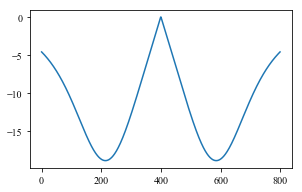

In [191]:
# plt.imshow(maps[0][1]*1e4)

Brho_z0=maps[0][1][400,:]

Brho_z0=np.hstack([Brho_z0[::-1],Brho_z0,])

plt.plot(Brho_z0*1e4)